In [1]:
#Dataset from Kaggle: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("diabetes.csv") # this path is generalized, please input original local file path here
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe(include='all')
#Look at descriptive stats to understand data and identify any inconsistency, missing values, and outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

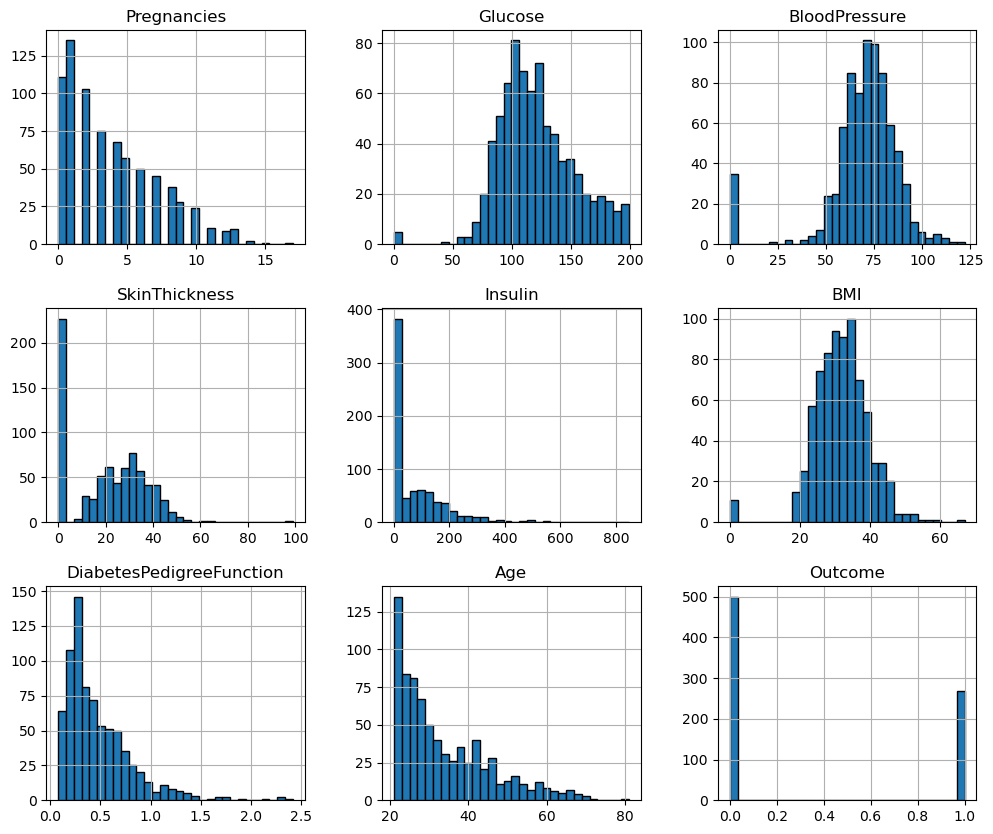

In [5]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
#Look at histogram to understand spread of data

<Axes: >

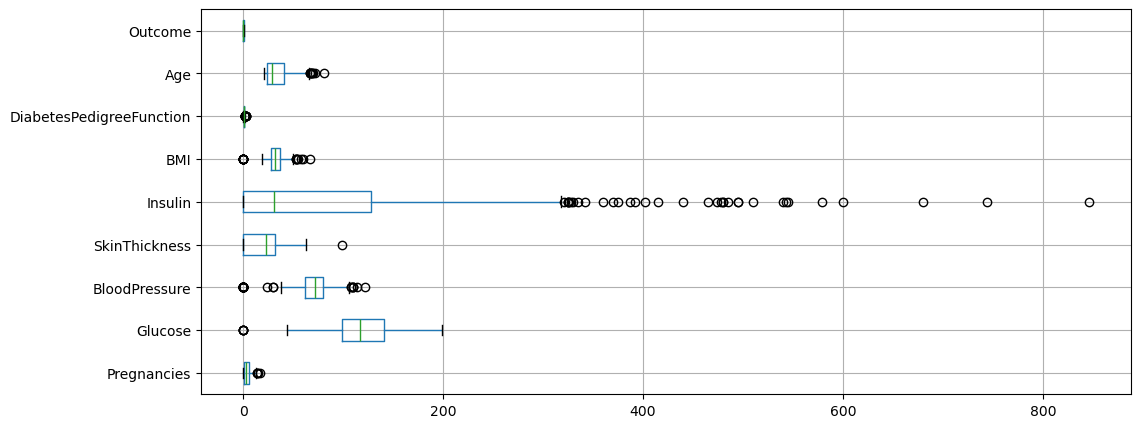

In [6]:
df.boxplot(figsize=(12,5), vert=False)
#Look at boxplot to understand spread of data

In [7]:
# Missing Values:
#1. BloodPressue, SkinThickness, Insulin, BMI, and Age have a Min of 0, which is impossible and indicate missing value

# Outliers:
#2. BloodPressure at 122 (diastollic) is possible but indicates medical emergency
#3. SkinThickness of 99mm is unrealistic
#4. Insulin at 846 is unrealistic
#5. BMI at 67 is rare

In [8]:
#Assign 0 as missing values for Glucose, BloodPressue, SkinThickness, Insulin, BMI

columns_missing_value = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[columns_missing_value] = df[columns_missing_value].replace(0, np.nan)

df[columns_missing_value]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


<Axes: >

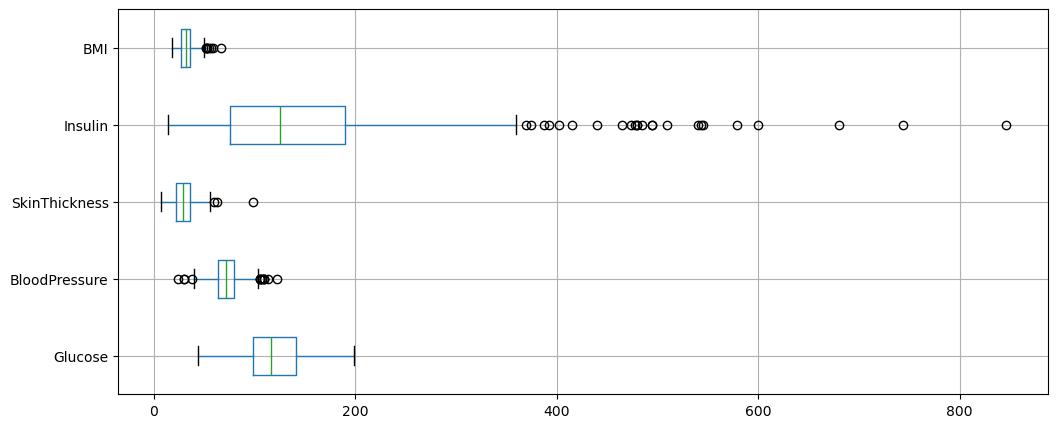

In [9]:
df[columns_missing_value].boxplot(figsize=(12,5), vert=False)

In [10]:
df[columns_missing_value].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [11]:
df[columns_missing_value].isnull().sum()/ len(df)*100

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

In [12]:
#SkinThickness and Insulin have a high percentage of missing values, replacing it with mean may affect modelling results later on, hence we should replace it with predicted values.
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [13]:
#Identify correlation of SkinThickness and Insulin with other fields for prediction
correlation_matrix[["SkinThickness", "Insulin"]].abs() > 0.2

,SkinThickness,Insulin
Pregnancies,False,False
Glucose,True,True
BloodPressure,True,False
SkinThickness,True,False
Insulin,False,True
BMI,True,True
DiabetesPedigreeFunction,False,False
Age,False,True
Outcome,True,True


In [14]:
#Select features use to predict missing values
correlated_features = correlation_matrix[["SkinThickness", "Insulin"]].abs() > 0.2
selected_features = correlation_matrix.index[correlated_features.any(axis=1)].tolist()
selected_features.remove("SkinThickness")
selected_features.remove("Insulin")
print(f"Selected features for imputation: {selected_features}")

Selected features for imputation: ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']


In [15]:
#Define function
def impute_missing_values(df, target_column, feature_columns):
    #Split the data into missing and non-missing, so we can predict missing values using non-missing data
    df_train = df[df[target_column].notna()] 
    df_missing = df[df[target_column].isna()]  
    
    if not df_missing.empty:
        # Define X (predictors) and y (target)
        X_train = df_train[feature_columns]
        y_train = df_train[target_column]
        
        # Train regression model
        model = RandomForestRegressor()
        model.fit(X_train, y_train)

        # Predict missing values
        X_missing = df_missing[feature_columns]
        df.loc[df[target_column].isna(), target_column] = model.predict(X_missing)

In [16]:
# Impute missing values for SkinThickness and Insulin
impute_missing_values(df, "SkinThickness", selected_features)
impute_missing_values(df, "Insulin", selected_features)

In [17]:
print(df.isnull().sum())

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [18]:
#Replace remaining missing values (Glucose, BloodPressure and BMI) with mean
df.fillna(df.mean(), inplace=True)
df[columns_missing_value].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,28.812604,156.835247,32.457464
std,30.435949,12.096346,9.718097,101.212322,6.875151
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,22.000000,87.562500,27.500000
50%,117.000000,72.202592,28.000000,136.425000,32.400000
75%,140.250000,80.000000,35.082500,193.782500,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [19]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
#Replace outliers for SkinThickness, Insulin, BloodPressue, and BMI with outlier cutoff value at IQR Upper Bound:
def replace_outliers_with_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

In [21]:
outlier_columns = ["SkinThickness", "Insulin", "BloodPressure", "BMI"]

In [22]:
for column in outlier_columns:
    df = replace_outliers_with_iqr(df, column)

<Axes: >

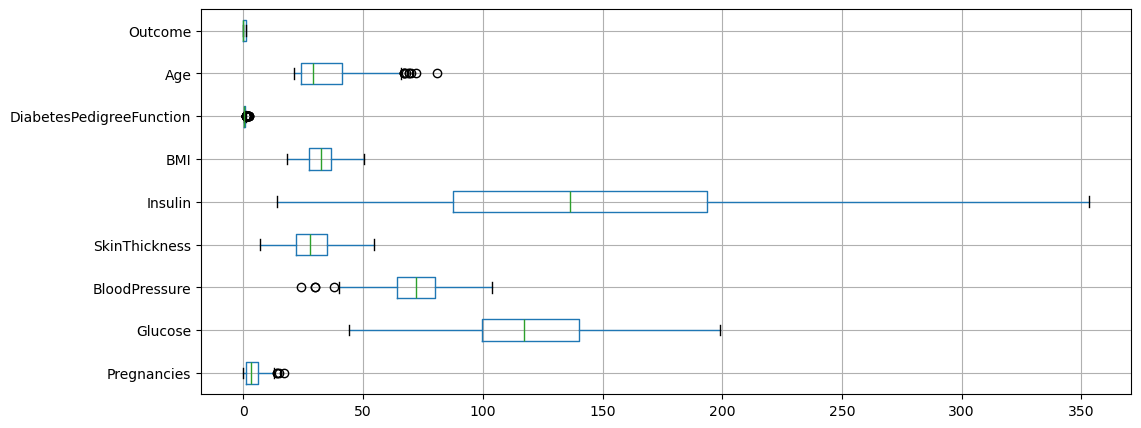

In [23]:
df.boxplot(figsize=(12,5), vert=False)

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.327059,28.735553,151.042243,32.395615,0.471876,33.240885,0.348958
std,3.369578,30.435949,11.858388,9.367693,81.590922,6.667466,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,87.562500,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,28.000000,136.425000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.082500,193.782500,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,104.000000,54.706250,353.112500,50.250000,2.420000,81.000000,1.000000


In [25]:
#Save the cleaned dataset
df.to_csv("cleaned_diabetes.csv", index=False)

In [26]:
#Exploration: Finding out number of diabetic patients by obesity level
#First, split bmi into categories
def bmi_categories(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

In [27]:
df['Obesity_Level'] = df['BMI'].apply(bmi_categories)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Obesity_Level
0,6,148.0,72.0,35.00,188.79,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.00,51.48,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,18.15,255.30,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0,Obese
764,2,122.0,70.0,27.00,184.85,36.8,0.340,27,0,Obese
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0,Overweight
766,1,126.0,60.0,26.04,146.71,30.1,0.349,47,1,Obese


In [28]:
obesity_diabetes_count = df[df["Outcome"] == 1]["Obesity_Level"].value_counts()
obesity_diabetes_count

Obesity_Level
Obese         221
Overweight     40
Normal          7
Name: count, dtype: int64

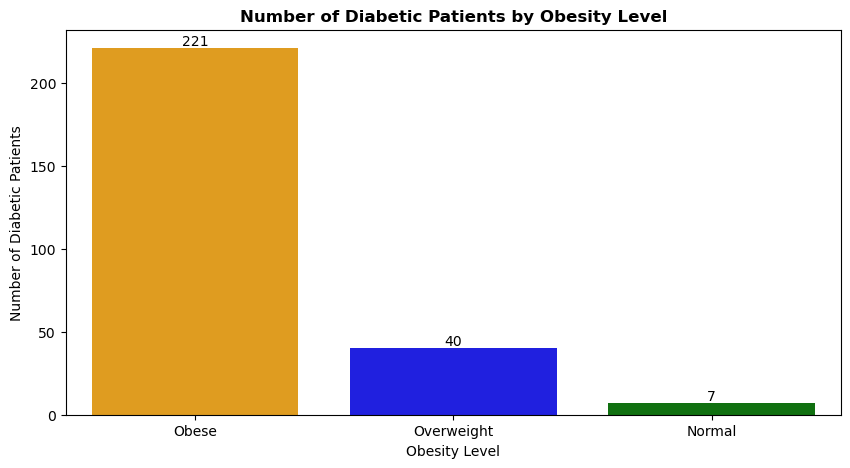

In [29]:
plt.figure(figsize=(10,5))
colors = ["orange", "blue", "green"]
ax = sns.barplot(x=obesity_diabetes_count.index, y=obesity_diabetes_count.values, palette=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Obesity Level")
plt.ylabel("Number of Diabetic Patients")
plt.title("Number of Diabetic Patients by Obesity Level",fontsize=12, fontweight="bold")
plt.show()